# About Dataset
This dataset includes scores from three test scores of students at a (fictional) public school and 
a variety of personal and socio-economic factors that may have interaction effects upon them.

# Remark/warning/disclaimer:

This datasets are fictional and should be used for educational purposes only.

The original dataset generator creator is Mr. Royce Kimmons

There are similar datasets on kaggle already but this one is different and arguably better in two ways.

-> 1) has more data (>30k instead of just the 1k the other datasets have),

-> 2) has extended datasets with more features (15 instead of 9) and has missing values which makes it ideal 

for data cleaning and data preprocessing.

# Data Dictionary (column description)

## Gender: 
Gender of the student (male/female)
## EthnicGroup: 
Ethnic group of the student (group A to E)
## ParentEduc: 
Parent(s) education background (from some_highschool to master's degree)
## LunchType: 
School lunch type (standard or free/reduced)
## TestPrep: 
Test preparation course followed (completed or none)
## ParentMaritalStatus: 
Parent(s) marital status (married/single/widowed/divorced)
## PracticeSport: 
How often the student parctice sport (never/sometimes/regularly))
## IsFirstChild: 
If the child is first child in the family or not (yes/no)
## NrSiblings: 
Number of siblings the student has (0 to 7)
## TransportMeans: 
Means of transport to school (schoolbus/private)
## WklyStudyHours: 
Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
## MathScore: 
math test score(0-100)
## ReadingScore: 
reading test score(0-100)
## WritingScore: 
writing test score(0-100)

# Analytics questions:

What factors (features) affect test scores most?

Are there interacting features which affect test scores?


In [1]:
# Importing required libraries..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import and read dataset..
student_data = pd.read_csv("student_score_Expanded_data_with_more_features.csv")
student_data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
# copying dataset..
data= student_data.copy()

In [4]:
# Getting shape of data..
data.shape

(30641, 15)

In [5]:
# Getting information about dataset..
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
# Statistical description of all the numerical columns..
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [7]:
# Statistical description of all the categorical columns..
data.describe(include="object")

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
count,30641,28801,28796,30641,28811,29451,30010,29737,27507,29686
unique,2,5,6,2,2,4,3,2,2,3
top,female,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10
freq,15424,9212,6633,19905,18856,16844,15213,19082,16145,16246


In [8]:
#Delete unames: 0 column..
del data["Unnamed: 0"]

In [9]:
data.head(2)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88


## Check for missing values=>

In [10]:
# check for null values..
data.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [11]:
# Get percentages of null values present..
data.isnull().sum() * 100 / data.shape[0]

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [12]:
# Fill the missing values of categorical column with the mode()..
data["EthnicGroup"] = data["EthnicGroup"].fillna(data.EthnicGroup.mode().iloc[0])
data["ParentEduc"] = data["ParentEduc"].fillna(data.ParentEduc.mode().iloc[0])
data["TestPrep"] = data["TestPrep"].fillna(data.TestPrep.mode().iloc[0])
data["ParentMaritalStatus"] = data["ParentMaritalStatus"].fillna(data.ParentMaritalStatus.mode().iloc[0])
data["PracticeSport"] = data["PracticeSport"].fillna(data.PracticeSport.mode().iloc[0])
data["IsFirstChild"] = data["IsFirstChild"].fillna(data.IsFirstChild.mode().iloc[0])
data["TransportMeans"] = data["TransportMeans"].fillna(data.TransportMeans.mode().iloc[0])
data["WklyStudyHours"] = data["WklyStudyHours"].fillna(data.WklyStudyHours.mode().iloc[0])

In [13]:
# Fill the missing values of discret numerical column with the median()..
data["NrSiblings"] = data["NrSiblings"].fillna(data.NrSiblings.median())

In [14]:
# Check for null values..
data.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [15]:
# Changing datatype of NrSiblings column as object..
data["NrSiblings"] =data["NrSiblings"].astype("object")

# Data Visualisation=>


### 1) Analyzing Gender feature..

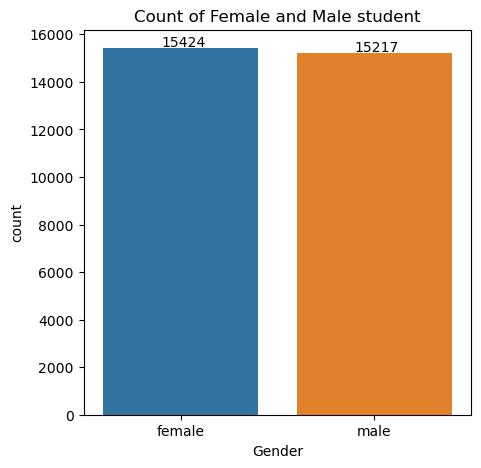

In [16]:
# Getting count of Gender..
plt.figure(figsize=(5,5))
plt.title("Count of Female and Male student")
ax = sns.countplot(data=data, x="Gender", hue="Gender")
for patch in ax.patches:
    value = int(patch.get_height())
    x_axis = patch.get_x()
    ax.annotate(value, xy=(x_axis+0.3, value+50))
# ax.bar_label(ax.containers[0])
plt.show()

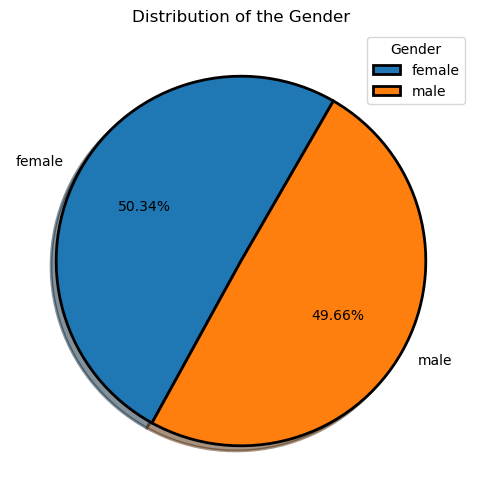

In [17]:
# Distribution of Gender column using pie plot=>
value = data["Gender"].value_counts()
label = data["Gender"].unique()
plt.figure(figsize=(6,6))
plt.title("Distribution of the Gender")
plt.pie(x=value, labels=label, data=data, startangle=60, autopct="%1.2f%%", shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'antialiased': True})
plt.legend(title="Gender",loc="upper right")
plt.show()

In [18]:
# Grouping gender with the all test scores mean..
gender_gb = data.groupby("Gender").aggregate({"MathScore":"mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
gender_gb

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


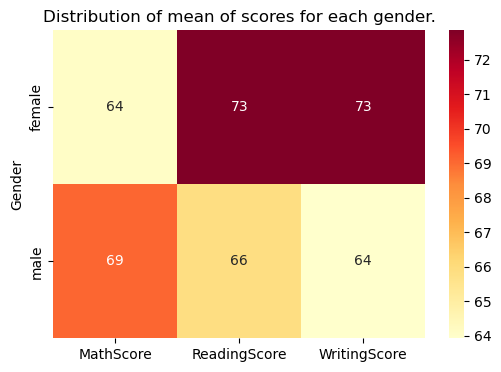

In [19]:
# Ploting relationship between gender and test scores..
plt.figure(figsize=(6,4))
plt.title("Distribution of mean of scores for each gender.")
sns.heatmap(data=gender_gb, annot=True, cmap="YlOrRd")
plt.show()

Here the female student has more score than male student.

## 2) Analyzing Ethnic Group feature =>

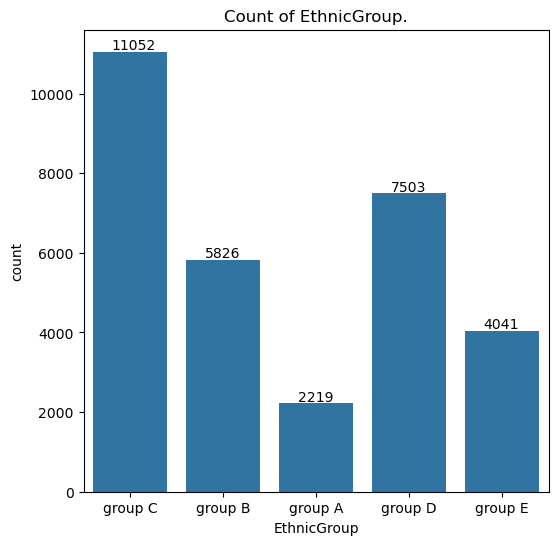

In [20]:
# Ploting count of EthnicGroup..
plt.figure(figsize=(6,6))
plt.title("Count of EthnicGroup.")
ax = sns.countplot(data=data, x="EthnicGroup")
for patch in ax.patches:
    value = int(patch.get_height())
    x_axis = patch.get_x()
    ax.annotate(value, xy=(x_axis+0.2, value+50))
plt.show()

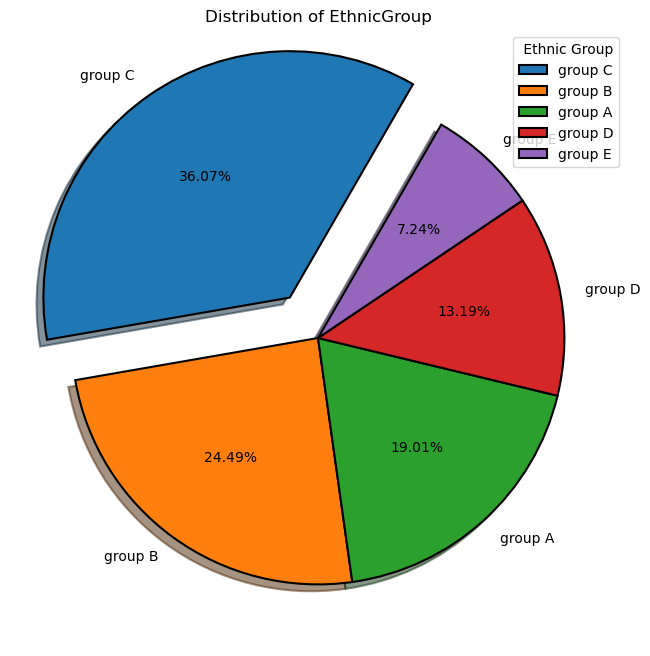

In [21]:
# Distribution of EthnicGroup =>
values = data["EthnicGroup"].value_counts()
label = data["EthnicGroup"].unique()
plt.figure(figsize=(8,8))
plt.title("Distribution of EthnicGroup")
plt.pie(x=values, labels=label, data=data, startangle=60, autopct="%1.2f%%", explode=[0.2, 0, 0,0,0], shadow=True,
        wedgeprops={"edgecolor": "black", "linewidth" : 1.5 , 'antialiased': True})
plt.legend(title=" Ethnic Group", loc="upper right")
plt.show()

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.943811     68.517734     67.149294
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


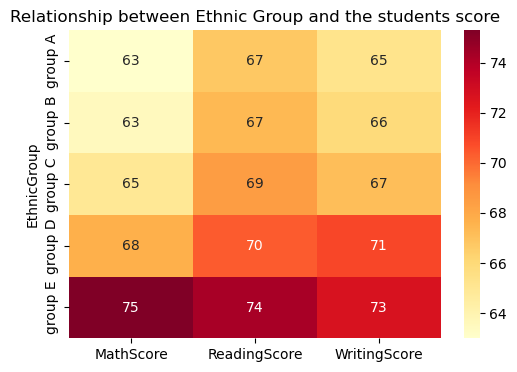

In [22]:
# Ploting relationship between EthnicGroup and test scores..
EthnicGroup_gb = data.groupby("EthnicGroup").aggregate({"MathScore":"mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(EthnicGroup_gb)
plt.figure(figsize=(6,4))
plt.title("Relationship between Ethnic Group and the students score")
sns.heatmap(data=EthnicGroup_gb, annot=True, cmap="YlOrRd")
plt.show()

Here we found that the Ethnic group E has good performed followed by Group D and Group C

## 3) Analyzing ParentsEducation =>

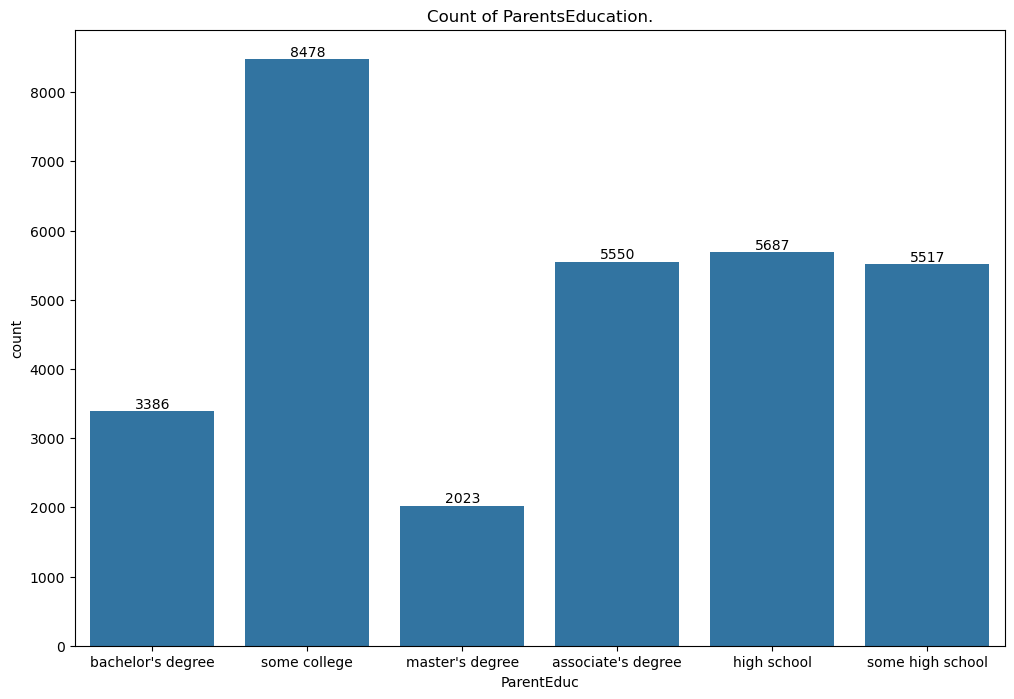

In [23]:
# Ploting count of ParentsEducation..
plt.figure(figsize=(12,8))
plt.title("Count of ParentsEducation.")
ax = sns.countplot(data=data, x="ParentEduc")
ax.bar_label(ax.containers[0])
plt.show()

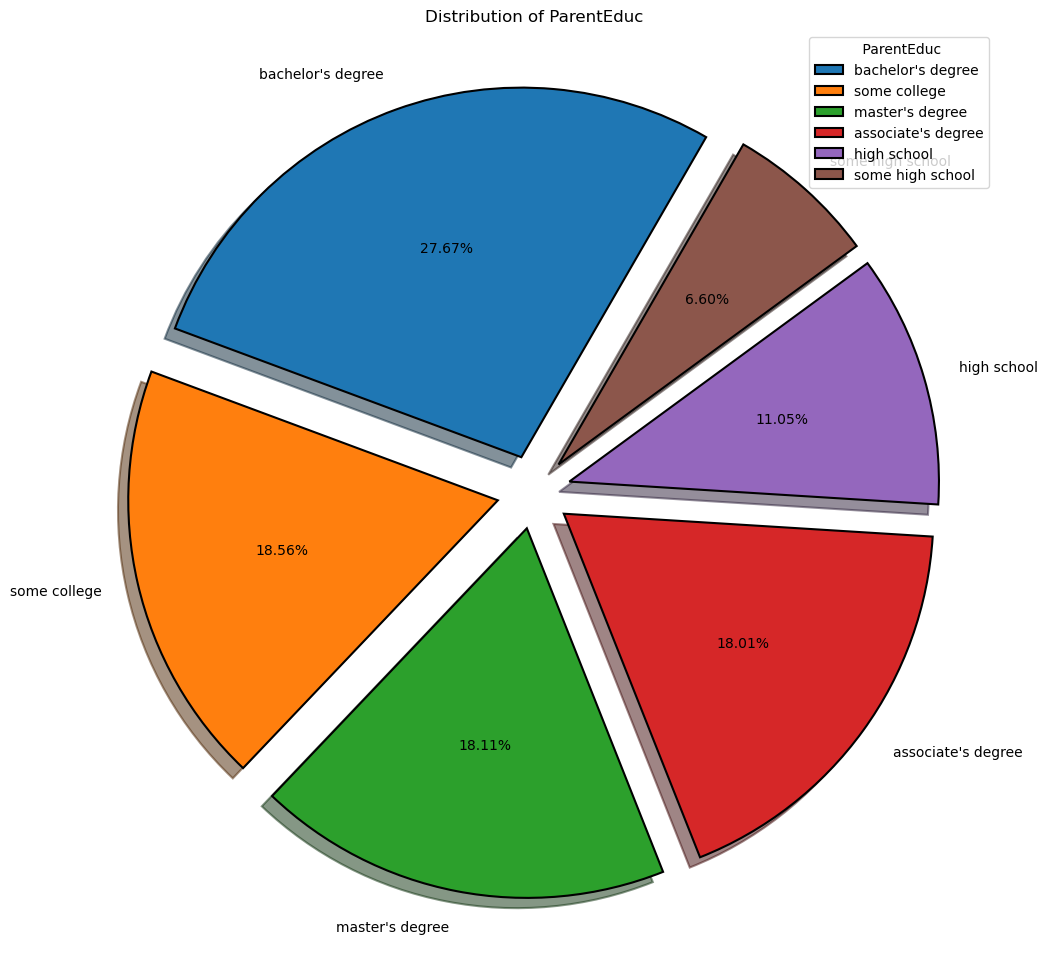

In [24]:
# Distribution of ParentEduc =>
values = data["ParentEduc"].value_counts()
label = data["ParentEduc"].unique()
plt.figure(figsize=(12,12))
plt.title("Distribution of ParentEduc")
plt.pie(x=values, labels=label, data=data, startangle=60, autopct="%1.2f%%", explode=[0.1, 0.1, 0.1,0.1,0.1,0.1], 
        shadow=True, wedgeprops={"edgecolor": "black", "linewidth" : 1.5 , 'antialiased': True})
plt.legend(title=" ParentEduc", loc="upper right")
plt.show()


                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.445978     69.189667     68.456711
some high school    62.584013     65.510785     63.632409


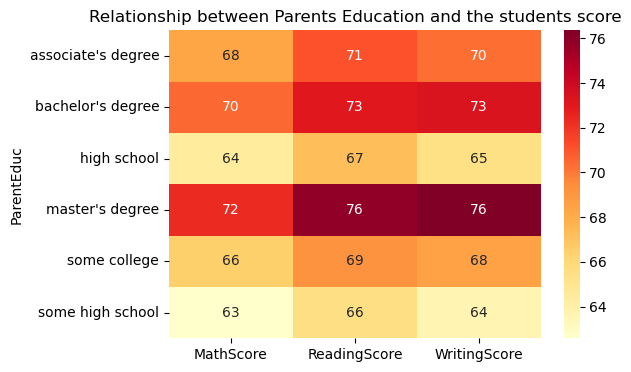

In [25]:
# pltoing Relationship between Parents Education and the students score using heatmap..
ParentEduc_gb = data.groupby("ParentEduc").aggregate({"MathScore":"mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(ParentEduc_gb)
plt.figure(figsize=(6,4))
plt.title("Relationship between Parents Education and the students score")
sns.heatmap(data=ParentEduc_gb, annot=True, cmap="YlOrRd")
plt.show()

Here the education of the parents is affecting the scores of the students.. The students which has parents having master's degree performed good in test followed by parents having bachlor's degree

## 4) Analyzing LuchType feature =>

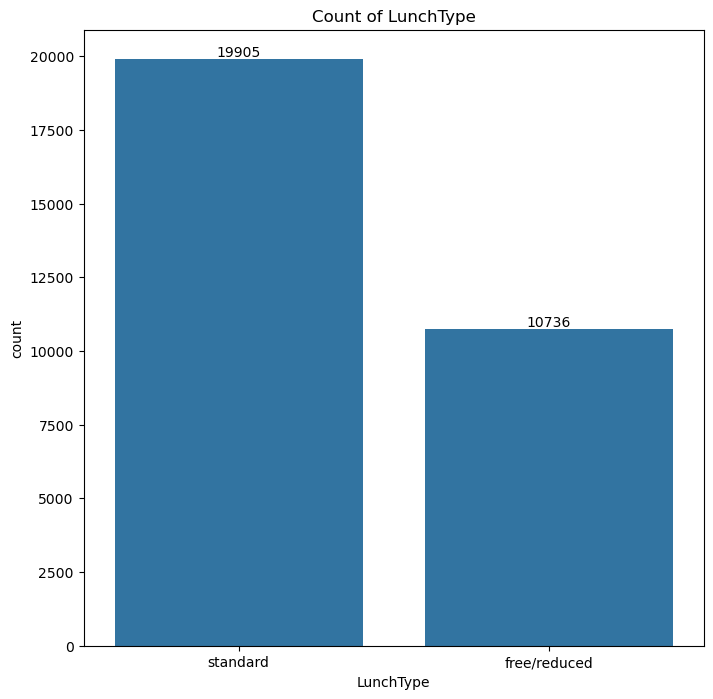

In [26]:
# Ploting count of LunchType..
plt.figure(figsize=(8,8))
plt.title("Count of LunchType")
ax = sns.countplot(data=data, x="LunchType")
ax.bar_label(ax.containers[0])
plt.show()

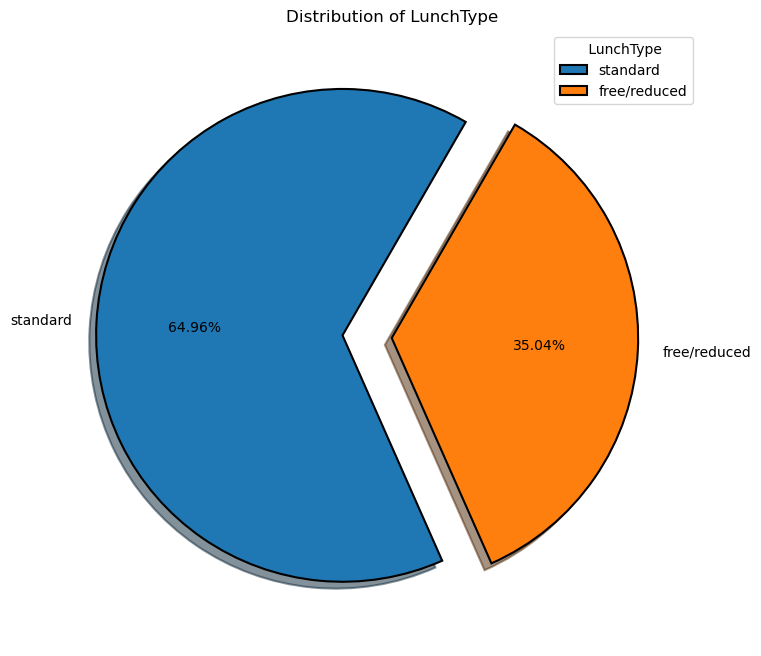

In [27]:
# Distribution of LunchType =>
values = data["LunchType"].value_counts()
label = data["LunchType"].unique()
plt.figure(figsize=(8,8))
plt.title("Distribution of LunchType")
plt.pie(x=values, labels=label, data=data, startangle=60, autopct="%1.2f%%", explode=[0.2, 0],
        shadow=True, wedgeprops={"edgecolor": "black", "linewidth" : 1.5 , 'antialiased': True})
plt.legend(title=" LunchType", loc="upper right")
plt.show()

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


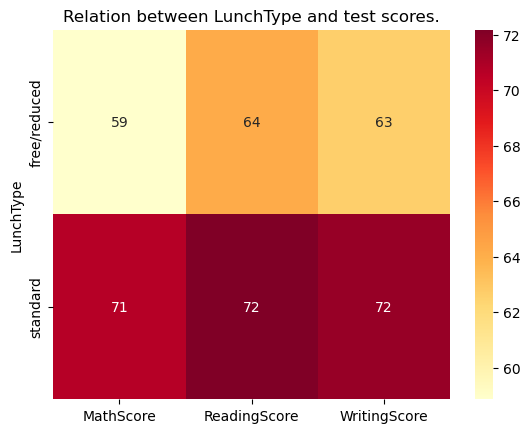

In [28]:
# Ploting relation between LunchType and test scores..
lunchtype_gb = data.groupby("LunchType").aggregate({"MathScore":"mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(lunchtype_gb)
plt.title("Relation between LunchType and test scores.")
sns.heatmap(data=lunchtype_gb, annot=True, cmap="YlOrRd")
plt.show()

Here students having standard lunch has comparetivly more scored  in test.

## 5) Analyzing TestPrep feature =>

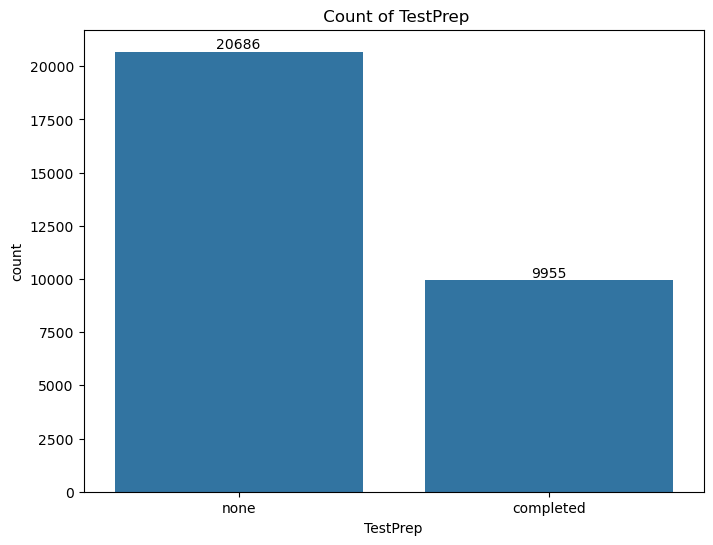

In [29]:
# Ploting count of TestPrep feature..
plt.figure(figsize=(8,6))
plt.title(" Count of TestPrep")
ax = sns.countplot(data=data, x="TestPrep")
ax.bar_label(ax.containers[0])
plt.show()

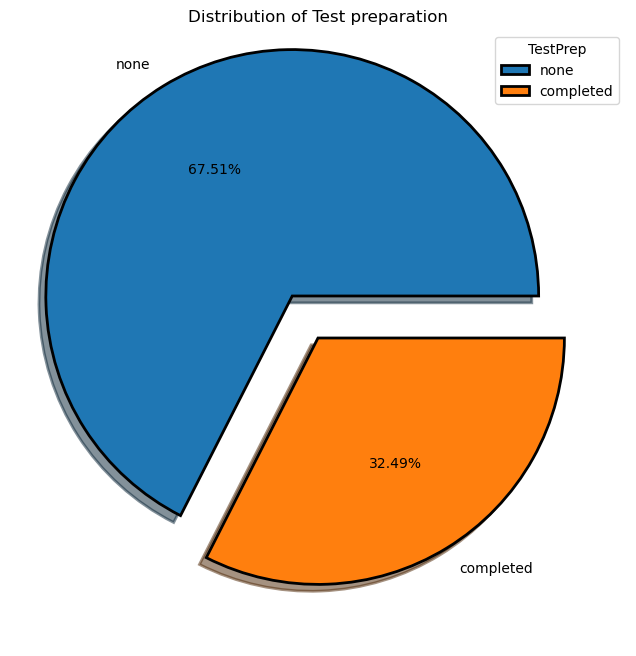

In [30]:
# Ploting Distribution of Test preparation using pie plot..
values = data.TestPrep.value_counts()
label = data.TestPrep.unique()
plt.figure(figsize=(8,8))
plt.title("Distribution of Test preparation")
plt.pie(x=values, labels=label, data=data, autopct="%1.2f%%", shadow=True, explode=[0.2,0],
        wedgeprops={"edgecolor" : "black", "linewidth" : 2})
plt.legend(title="TestPrep", loc="upper right")
plt.show()

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed  69.546660     73.732998     74.703265
none       65.120323     67.281495     65.394180


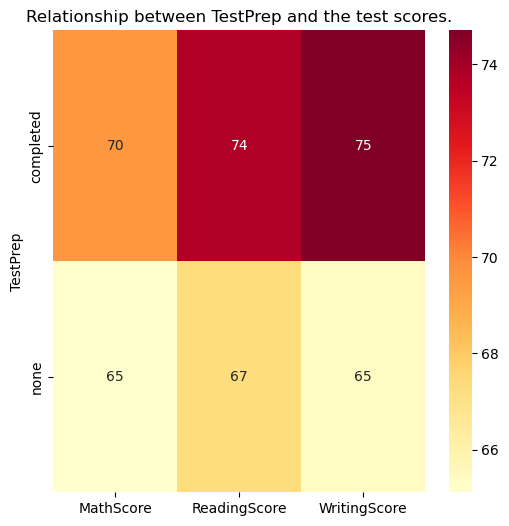

In [31]:
# Ploting relationship between TestPrep and test scores..
TestPrep_gb = data.groupby("TestPrep").aggregate({"MathScore":"mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(TestPrep_gb)
plt.figure(figsize=(6,6))
plt.title("Relationship between TestPrep and the test scores.")
sns.heatmap(data=TestPrep_gb, cmap="YlOrRd", annot=True)
plt.show()

Here we can see that the students who has completed their test preperation scored better than the students students who has not done preperation.

# 6) Analyzing ParentMaritalStatus feature =>

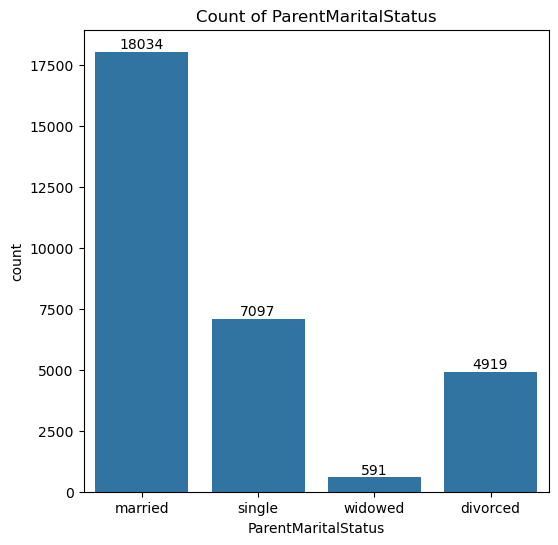

In [32]:
# ploting count plot for ParentsMaritualStatus..
plt.figure(figsize=(6,6))
plt.title("Count of ParentMaritalStatus")
ax = sns.countplot(data=data, x="ParentMaritalStatus")
ax.bar_label(ax.containers[0])
plt.show()

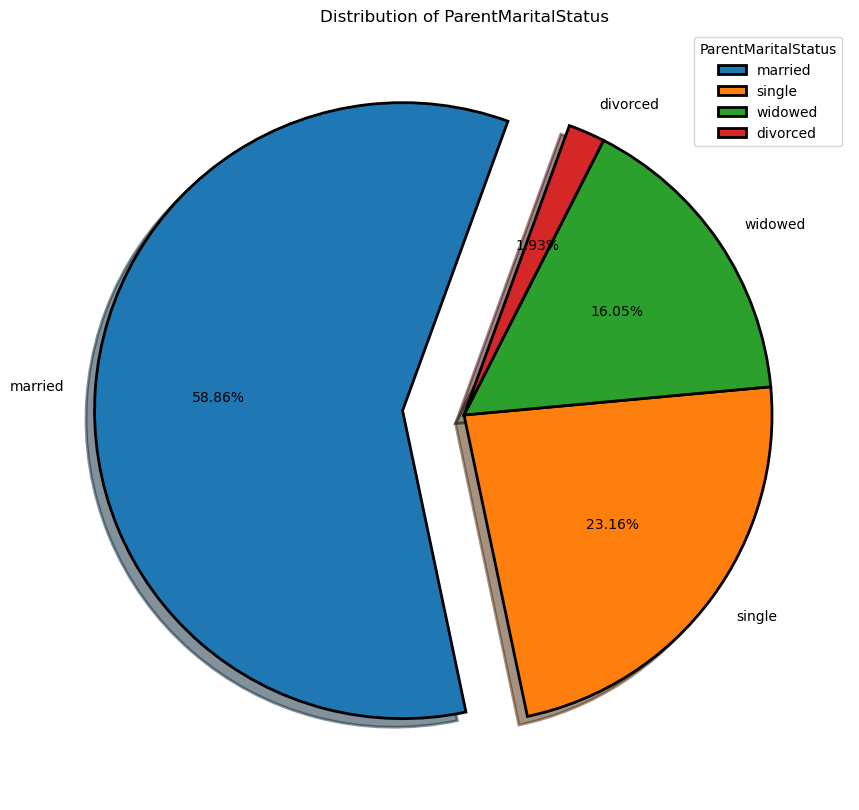

In [33]:
# Ploting Distribution of ParentsMaritualStatus using pie plot..
values = data.ParentMaritalStatus.value_counts()
label = data.ParentMaritalStatus.unique()
plt.figure(figsize=(10,10))
plt.title("Distribution of ParentMaritalStatus")
plt.pie(x=values, labels=label, data=data, startangle=70, autopct="%1.2f%%", shadow=True, explode=[0.2,0,0,0],
        wedgeprops={"edgecolor" : "black", "linewidth" : 2})
plt.legend(title="ParentMaritalStatus", loc="upper right")
plt.show()

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.650161     69.379561     68.406177
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


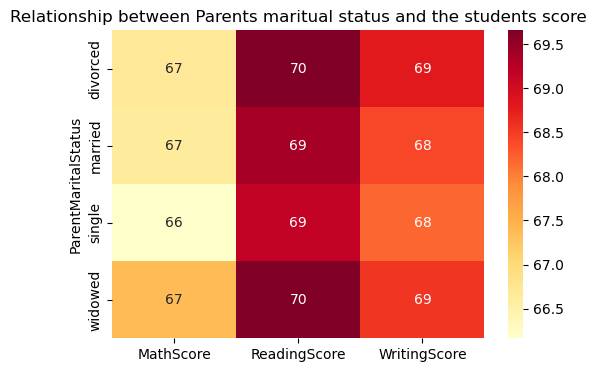

In [34]:
# Ploting relationship between ParentMaritalStatus and test scores..
ParentMaritalStatus_gb = data.groupby("ParentMaritalStatus").aggregate({"MathScore":"mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(ParentMaritalStatus_gb)
plt.figure(figsize=(6,4))
plt.title("Relationship between Parents maritual status and the students score")
sns.heatmap(data=ParentMaritalStatus_gb, annot=True, cmap="YlOrRd")
plt.show()

Here the maritual status of the parents has negligible impact on the scores of the students..

# 7) Analyzing PracticeSports feature =>

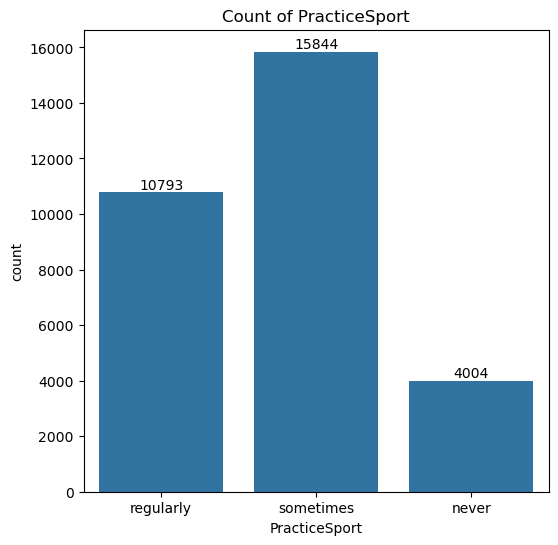

In [35]:
# ploting count plot for PracticeSport..
plt.figure(figsize=(6,6))
plt.title("Count of PracticeSport")
ax = sns.countplot(data=data, x="PracticeSport")
ax.bar_label(ax.containers[0])
plt.show()

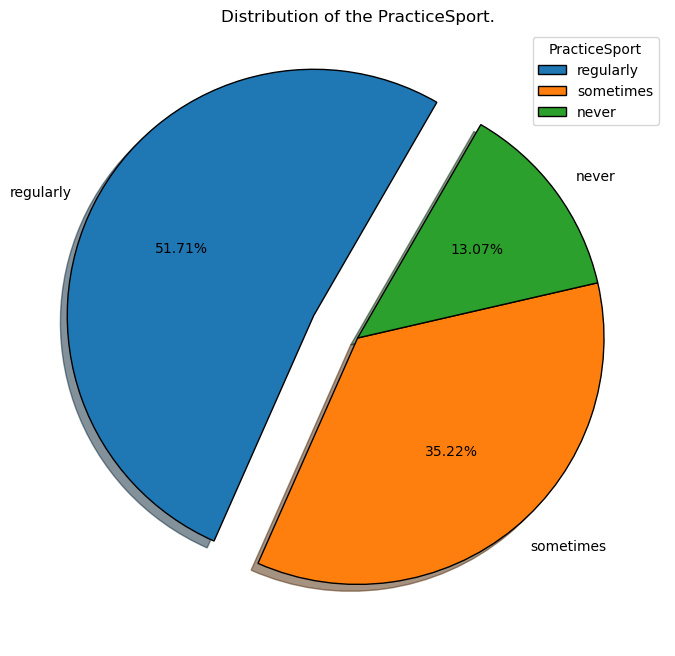

In [36]:
# Ploting Distribution of PracticeSport using pie plot..
value = data["PracticeSport"].value_counts()
label = data["PracticeSport"].unique()
plt.figure(figsize=(8,8))
plt.title("Distribution of the PracticeSport.")
plt.pie(x=value, labels=label, data=data, startangle=60, autopct="%0.2f%%", shadow=True, explode=[0.2,0,0],
        wedgeprops={"edgecolor":"black", "linewidth": 1})
plt.legend(title="PracticeSport", loc="upper right")
plt.show()

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.289258     69.255112     68.090255


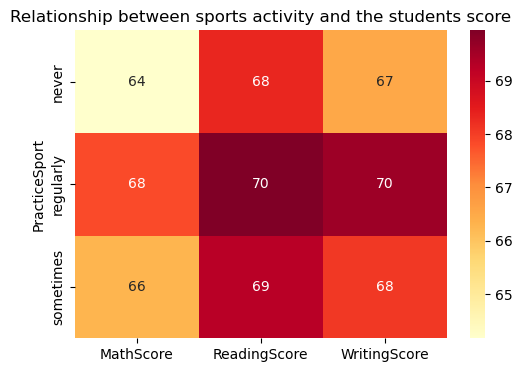

In [37]:
# Ploting relationship between ParentMaritalStatus and test scores..
PracticeSport_gb = data.groupby("PracticeSport").aggregate({"MathScore":"mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(PracticeSport_gb)
plt.figure(figsize=(6,4))
plt.title("Relationship between sports activity and the students score")
sns.heatmap(data=PracticeSport_gb, annot=True, cmap="YlOrRd")
plt.show()

Here students sports activity also not affecting the scores of the students..

# 8) Analyzing IsFirstChild feature =>

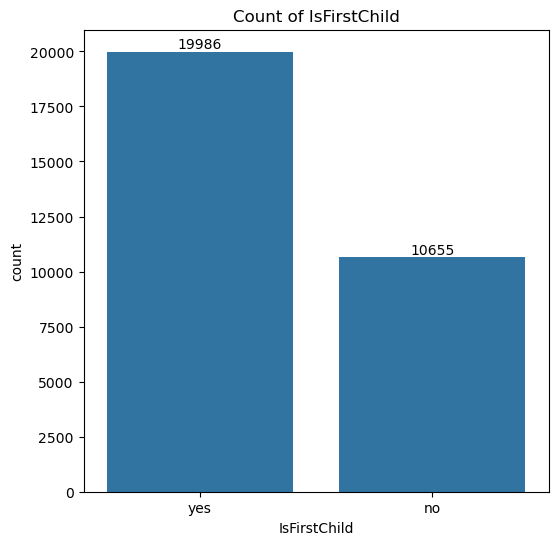

In [38]:
# ploting count plot for PracticeSport..
plt.figure(figsize=(6,6))
plt.title("Count of IsFirstChild")
ax = sns.countplot(data=data, x="IsFirstChild")
ax.bar_label(ax.containers[0])
plt.show()

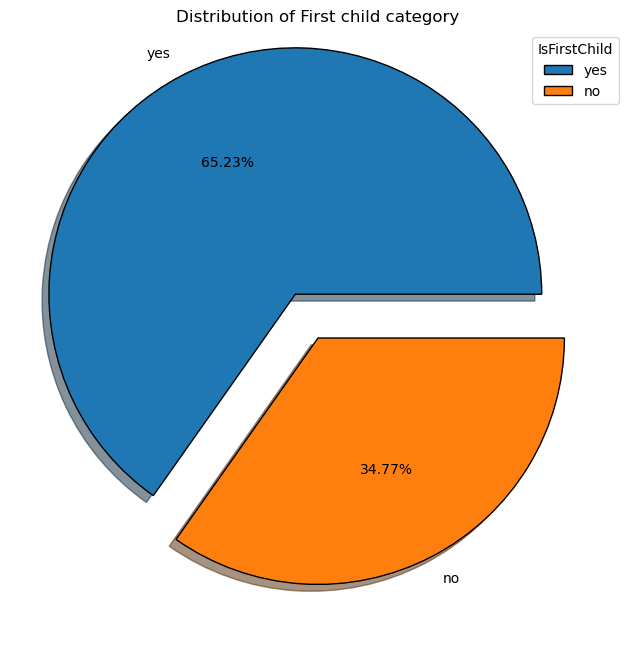

In [39]:
# Ploting Distribution of IsFirstChild using pie plot..
value = data["IsFirstChild"].value_counts()
label = data["IsFirstChild"].unique()
plt.figure(figsize=(8,8))
plt.title("Distribution of First child category")
plt.pie(x=value, labels=label, data=data, autopct="%0.2f%%", explode=[0.2,0], shadow=True,
        wedgeprops={"edgecolor":"black","linewidth":1})
plt.legend(title="IsFirstChild", loc="upper right")
plt.show()

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.724507     69.508106     68.529371


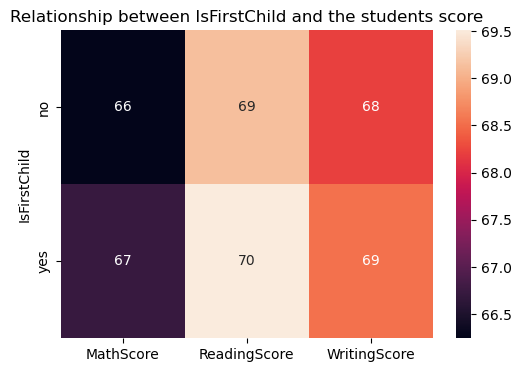

In [40]:
# Ploting relationship between IsFirstChild and test scores..
IsFirstChild_gb = data.groupby("IsFirstChild").aggregate({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(IsFirstChild_gb)
plt.figure(figsize=(6,4))
plt.title("Relationship between IsFirstChild and the students score")
sns.heatmap(data=IsFirstChild_gb, annot=True)
plt.show()

Here is negligible affect on the score of the students whether the student is first child or not.

# 8) Analyzing TransportMeans feature =>

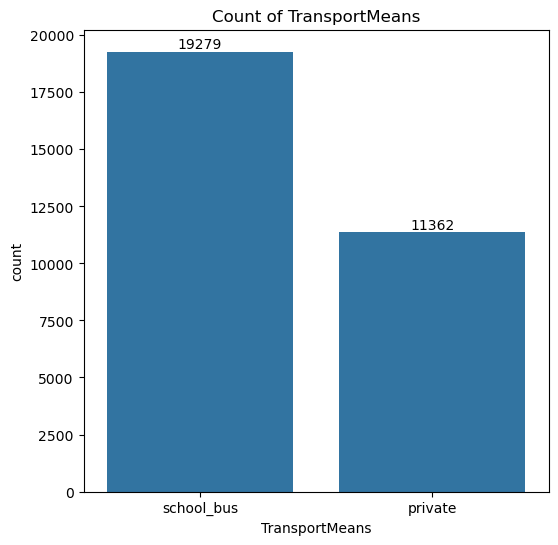

In [41]:
# ploting count plot for PracticeSport..
plt.figure(figsize=(6,6))
plt.title("Count of TransportMeans")
ax = sns.countplot(data=data, x="TransportMeans")
ax.bar_label(ax.containers[0])
plt.show()

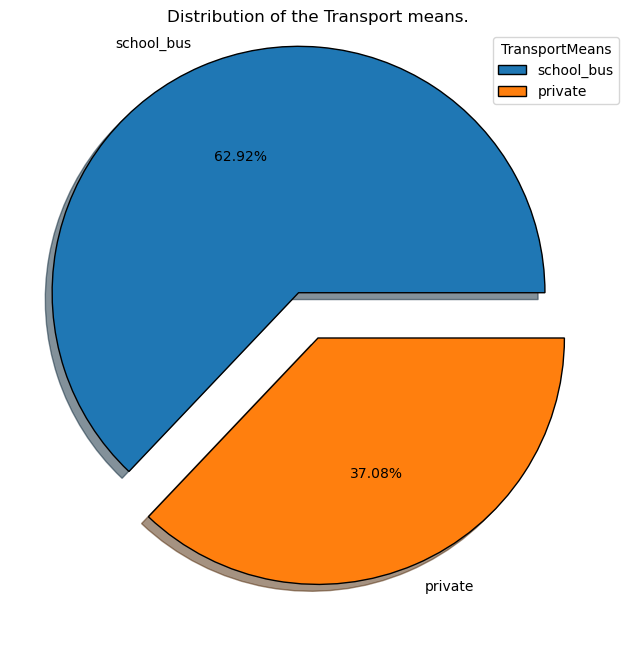

In [42]:
# Ploting Distribution of TransportMeans using pie plot..
value = data["TransportMeans"].value_counts()
label = data["TransportMeans"].unique()
plt.figure(figsize=(8,8))
plt.title("Distribution of the Transport means.")
plt.pie(x=value, labels=label, data=data, autopct="%0.2f%%", shadow=True, explode=[0.2,0],
        wedgeprops={"edgecolor":"black", "linewidth": 1})
plt.legend(title="TransportMeans", loc="upper right")
plt.show()

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.586130     69.321645     68.365009


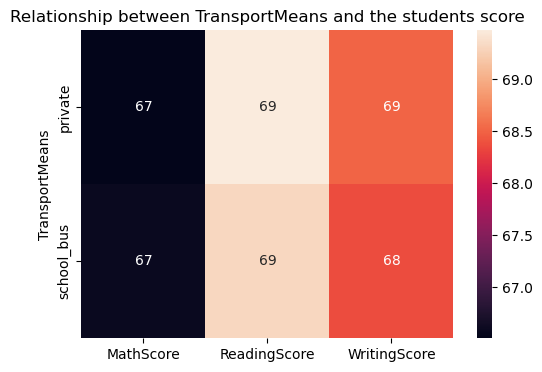

In [43]:
# Ploting relationship between TransportMeans and test scores..
TransportMeans_gb = data.groupby("TransportMeans").aggregate({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(TransportMeans_gb)
plt.figure(figsize=(6,4))
plt.title("Relationship between TransportMeans and the students score")
sns.heatmap(data=TransportMeans_gb, annot=True)
plt.show()

Here no significant impact on the scores of the students whether that student travel by school bus or privetly.

# CONCLUSION:
What factors (features) affect test scores most?

Here student's parents education, type of lunch features are impacting the most on the student's scores.

Also students who have completed their test preperation performed well compared to student's who have not done.

Students belonging to Ethnic group E has performed good followed by group D and C compared to other.
